Obs 0886090801 source 001. Not first X-ray detection. (268.3681, -24.7743 0.05")

SIMBAD HD 162718 
+ Be Star. 
+ Parallax 0.5548 mas. Distance 1800 pc.
+ Gaia 4067633238255477248


Temporal features:
+ Lightcurves show some varilability, across energy range.
+ Lightcurve duration ~20ks.
+ FFTs show no significant features that can be identified.
+ HENDRICS Z2n search for pulsations finds several candidate frequencies. 
+ Strongest candidate is 0.1253049943 mHz, so period of 7.98ks.

Spectral features:
+ Flux 8.8x10^-12 erg/s/cm^2
+ Fit to power law with photon index 1.34 and nH 0.4 x 10^22 /cm^2 which is less than the galactic value of 1.1.
+ G-magnitude 8.396
+ Fx/Fopt = 0.00073

Conclusion:

Source is likely a BE type star, where we have been able to identify the pulsations. The period of the pulsations is in line with those detected in similar objects.

In [1]:
%load_ext wurlitzer
import numpy as np
import os
import stingray as st
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [15, 8]

lc = fits.open('0886090801_PN1_dt1.lc')
bkg = fits.open('0886090801_PN1_dt1_bkg.lc')
full_gti = []
for j in lc[2].data:
    full_gti.append([j[0],j[1]])
soft = fits.open('0886090801_PN1_dt1_0.2-2keV.lc')
sbkg = fits.open('0886090801_PN1_dt1_0.2-2keV_bkg.lc')
soft_gti = []
for j in soft[2].data:
    soft_gti.append([j[0],j[1]])
hard = fits.open('0886090801_PN1_dt1_2-12keV.lc')
hbkg = fits.open('0886090801_PN1_dt1_2-12keV_bkg.lc')
hard_gti = []
for j in hard[2].data:
    hard_gti.append([j[0],j[1]])

In [2]:
full_lc = st.Lightcurve(lc[1].data.field('TIME'),lc[1].data.field('RATE'),err=lc[1].data.field('ERROR'),gti=full_gti,input_counts=False)
full_bkg = st.Lightcurve(bkg[1].data.field('TIME'),bkg[1].data.field('RATE'),err=bkg[1].data.field('ERROR'),gti=full_gti,input_counts=False)

soft_lc = st.Lightcurve(soft[1].data.field('TIME'),soft[1].data.field('RATE'),err=soft[1].data.field('ERROR'),gti=soft_gti,input_counts=False)
soft_bkg = st.Lightcurve(sbkg[1].data.field('TIME'),sbkg[1].data.field('RATE'),err=sbkg[1].data.field('ERROR'),gti=soft_gti,input_counts=False)

hard_lc = st.Lightcurve(hard[1].data.field('TIME'),hard[1].data.field('RATE'),err=hard[1].data.field('ERROR'),gti=hard_gti,input_counts=False)
hard_bkg = st.Lightcurve(hbkg[1].data.field('TIME'),hbkg[1].data.field('RATE'),err=hbkg[1].data.field('ERROR'),gti=hard_gti,input_counts=False)

full_lc.apply_gtis()
full_bkg.apply_gtis()
soft_lc.apply_gtis()
soft_bkg.apply_gtis()
hard_lc.apply_gtis()
hard_bkg.apply_gtis()

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:516: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:516: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


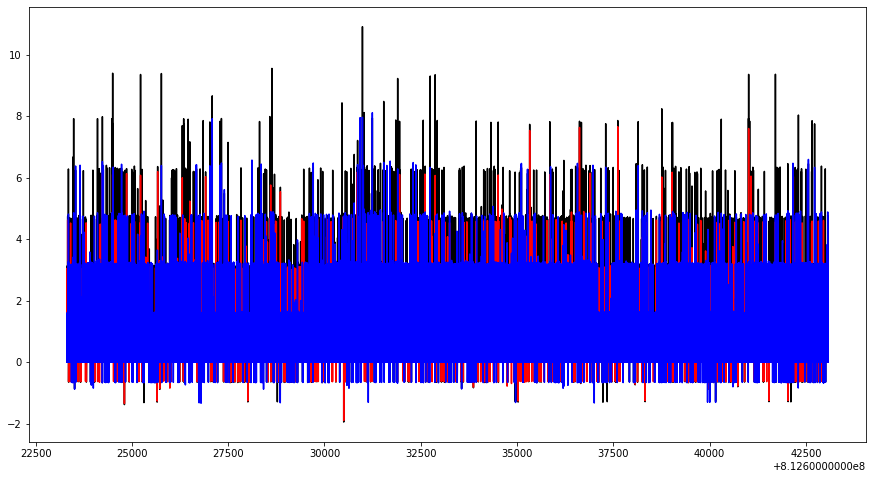

In [3]:
plt.plot(full_lc.time,full_lc.countrate,color='k')
plt.plot(soft_lc.time,soft_lc.countrate,color='r')
plt.plot(hard_lc.time,hard_lc.countrate,color='b')

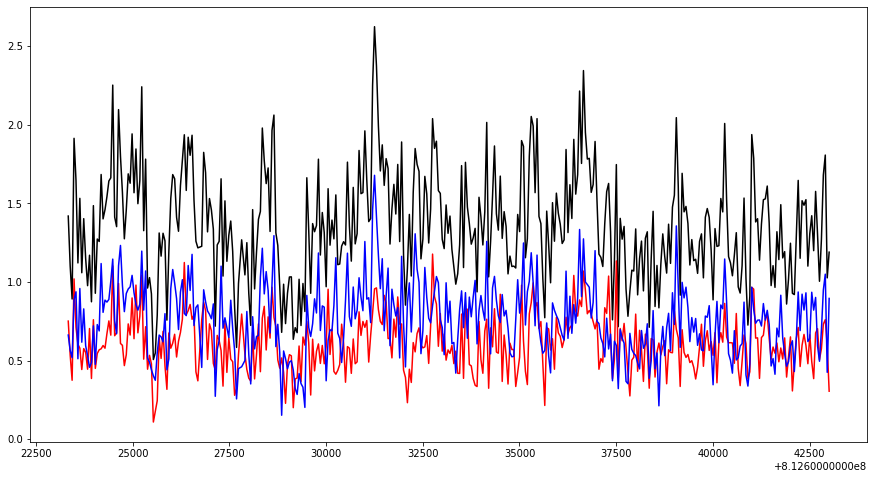

In [4]:
plt.plot(full_lc.rebin(50).time,full_lc.rebin(50).countrate,color='k')
plt.plot(soft_lc.rebin(50).time,soft_lc.rebin(50).countrate,color='r')
plt.plot(hard_lc.rebin(50).time,hard_lc.rebin(50).countrate,color='b')

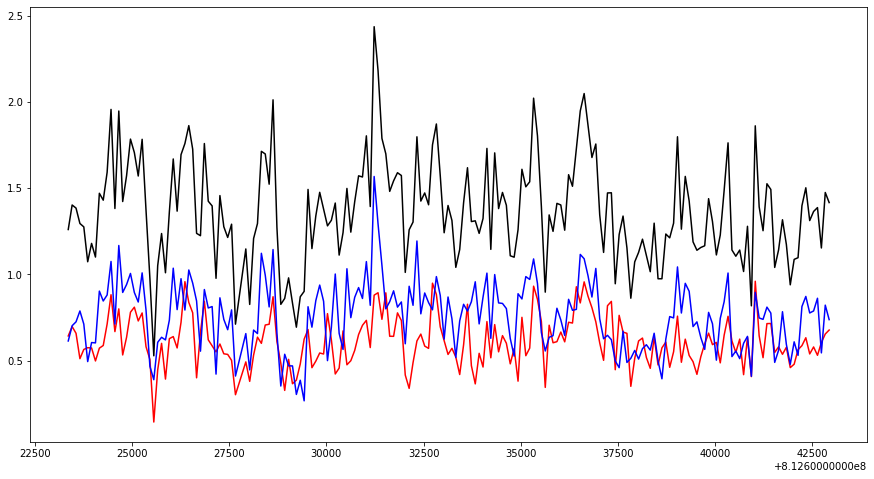

In [5]:
plt.plot(full_lc.rebin(100).time,full_lc.rebin(100).countrate,color='k')
plt.plot(soft_lc.rebin(100).time,soft_lc.rebin(100).countrate,color='r')
plt.plot(hard_lc.rebin(100).time,hard_lc.rebin(100).countrate,color='b')

In [6]:
full_psd = st.AveragedPowerspectrum(full_lc,segment_size=5000)
soft_psd = st.AveragedPowerspectrum(soft_lc,segment_size=5000)
hard_psd = st.AveragedPowerspectrum(hard_lc,segment_size=5000)

3it [00:00, 1800.90it/s]
3it [00:00, 2068.88it/s]
3it [00:00, 2002.05it/s]


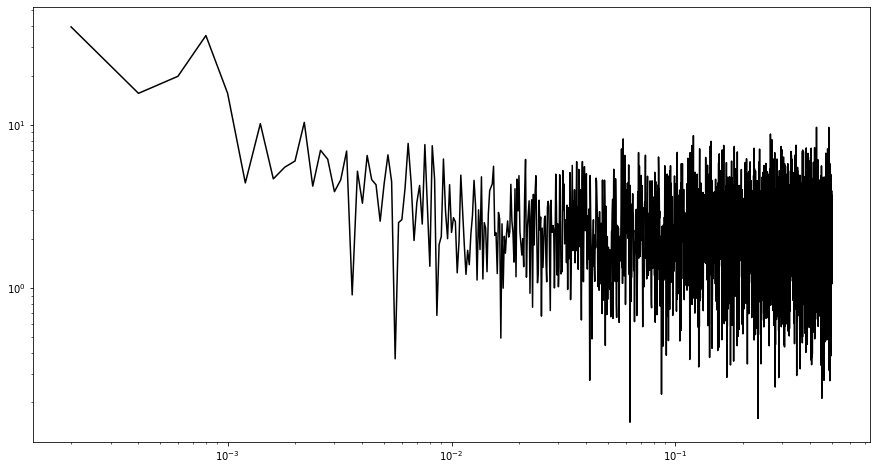

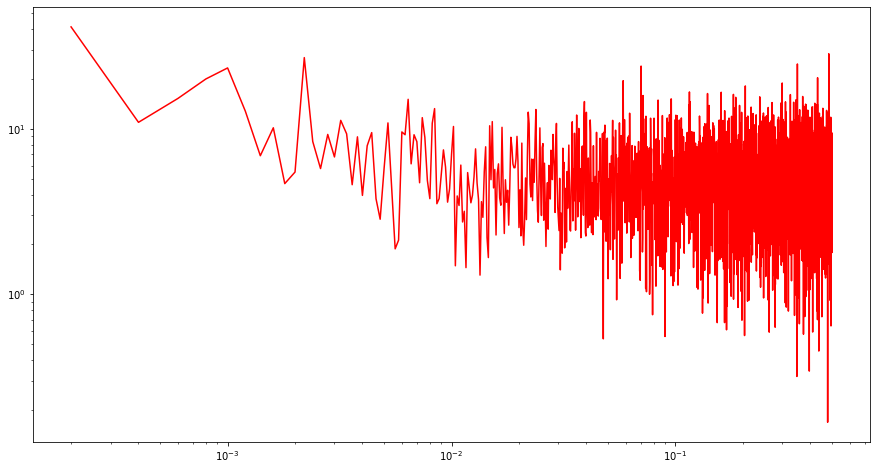

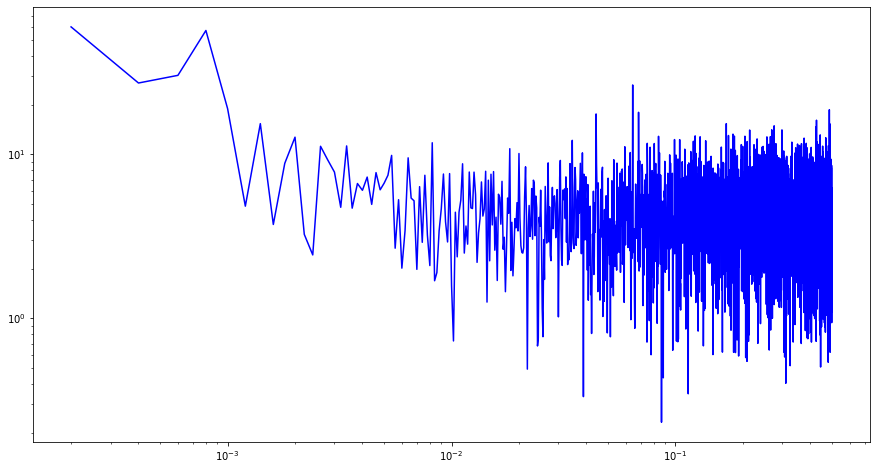

In [7]:
plt.loglog(full_psd.freq,full_psd.power,color='k')
plt.show()
plt.loglog(soft_psd.freq,soft_psd.power,color='r')
plt.show()
plt.loglog(hard_psd.freq,hard_psd.power,color='b')
plt.show()

In [8]:
full_psd10 = st.AveragedPowerspectrum(full_lc.rebin(10),segment_size=5000)
soft_psd10 = st.AveragedPowerspectrum(soft_lc.rebin(10),segment_size=5000)
hard_psd10 = st.AveragedPowerspectrum(hard_lc.rebin(10),segment_size=5000)

3it [00:00, 2601.93it/s]
3it [00:00, 3371.63it/s]
3it [00:00, 2683.50it/s]


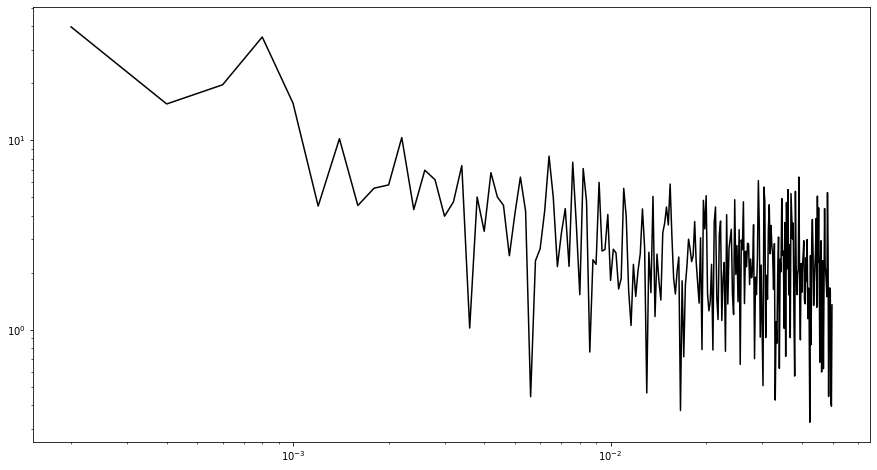

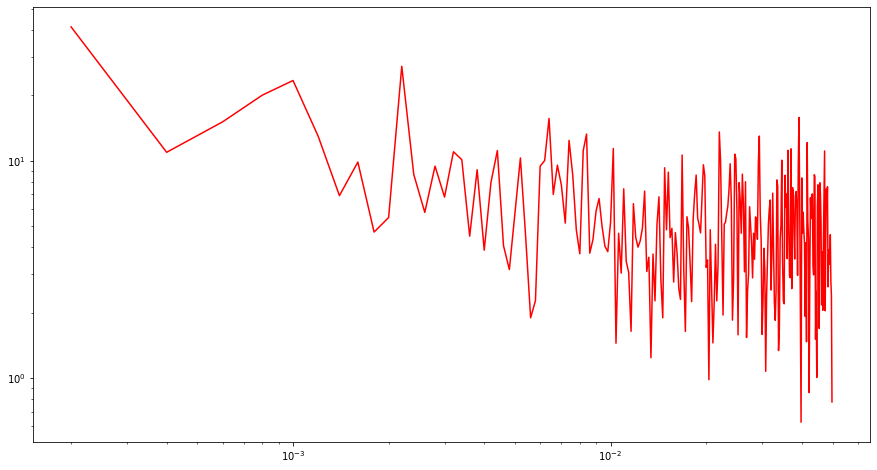

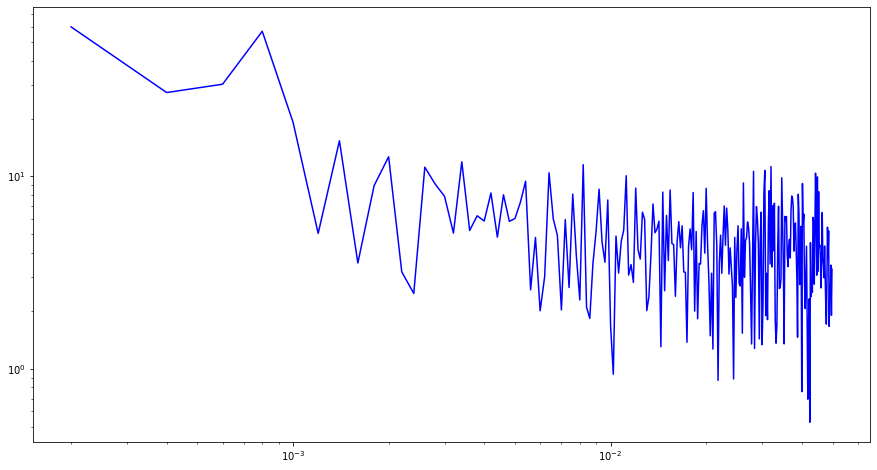

In [9]:
plt.loglog(full_psd10.freq,full_psd10.power,color='k')
plt.show()
plt.loglog(soft_psd10.freq,soft_psd10.power,color='r')
plt.show()
plt.loglog(hard_psd10.freq,hard_psd10.power,color='b')
plt.show()

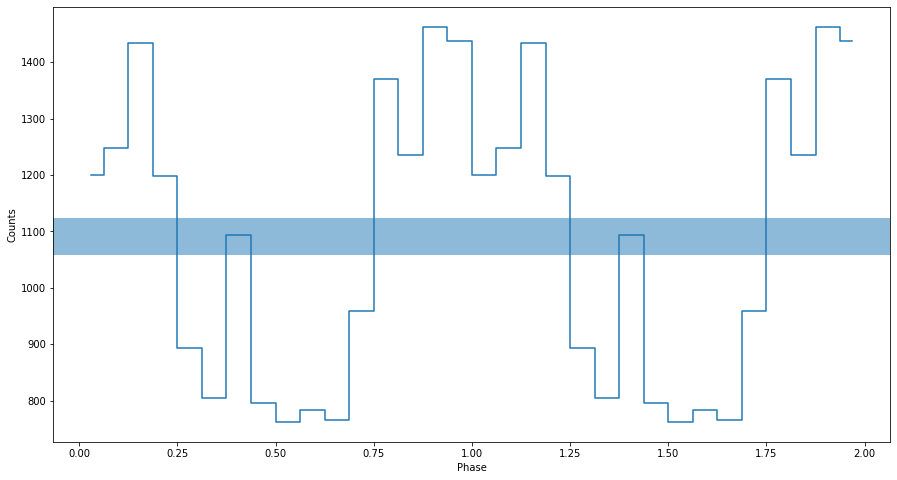

In [10]:
from stingray.pulse.pulsar import fold_events
from stingray.pulse.search import plot_profile
from stingray.pulse.search import epoch_folding_search, z_n_search
f0 = 0.0001253049943
P = 1 / f0
source_events = st.EventList.read('0886090801_PN1_src.evt',fmt_='hea',skip_checks=True)
ph, profile, profile_err = fold_events(source_events.time, f0)
_ = plot_profile(ph,profile)
plt.savefig('0886090801_pulseprof.png')


1 spectrum  in use
 
Spectral Data File: 0886090801_PN1grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.040e+00 +/- 8.015e-03 (95.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-104
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.768e+04 sec
 Using fit statistic: chi
 Using Background File                0886090801_PN1spec_bkg.fits
  Background Exposure Time: 1.768e+04 sec
 Using Response (RMF) File            0886090801_PN1spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886090801_PN1spec.arf



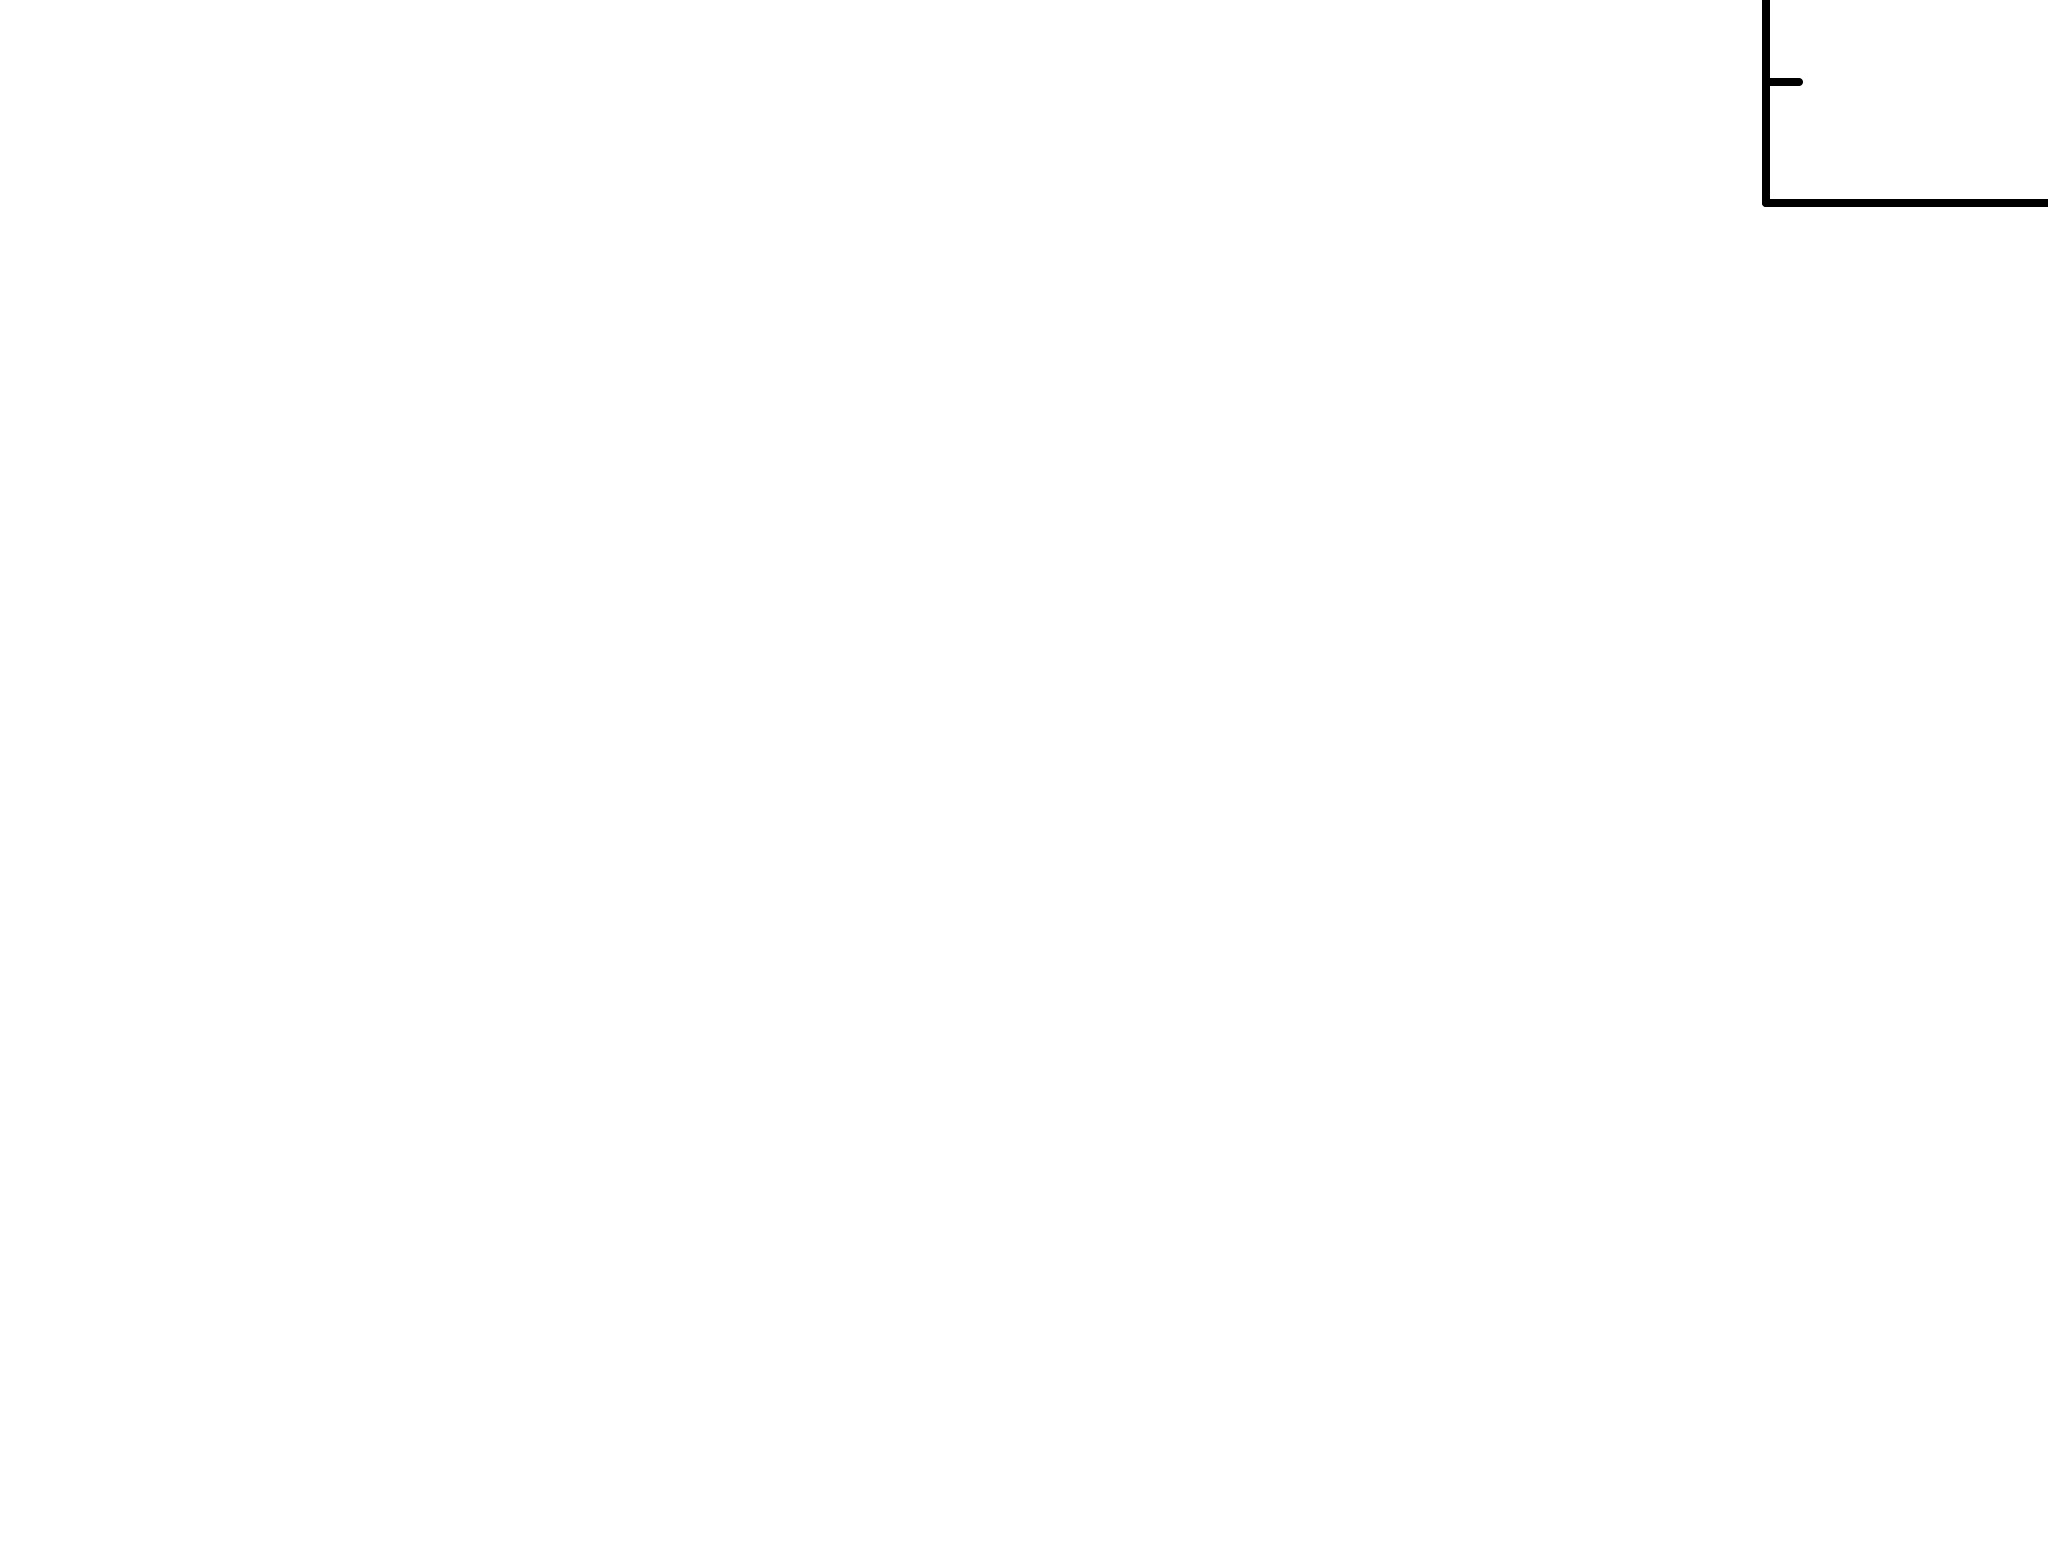

In [11]:
spec = Spectrum("0886090801_PN1grpspec.fits")
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0005 0.5")
Plot("data")

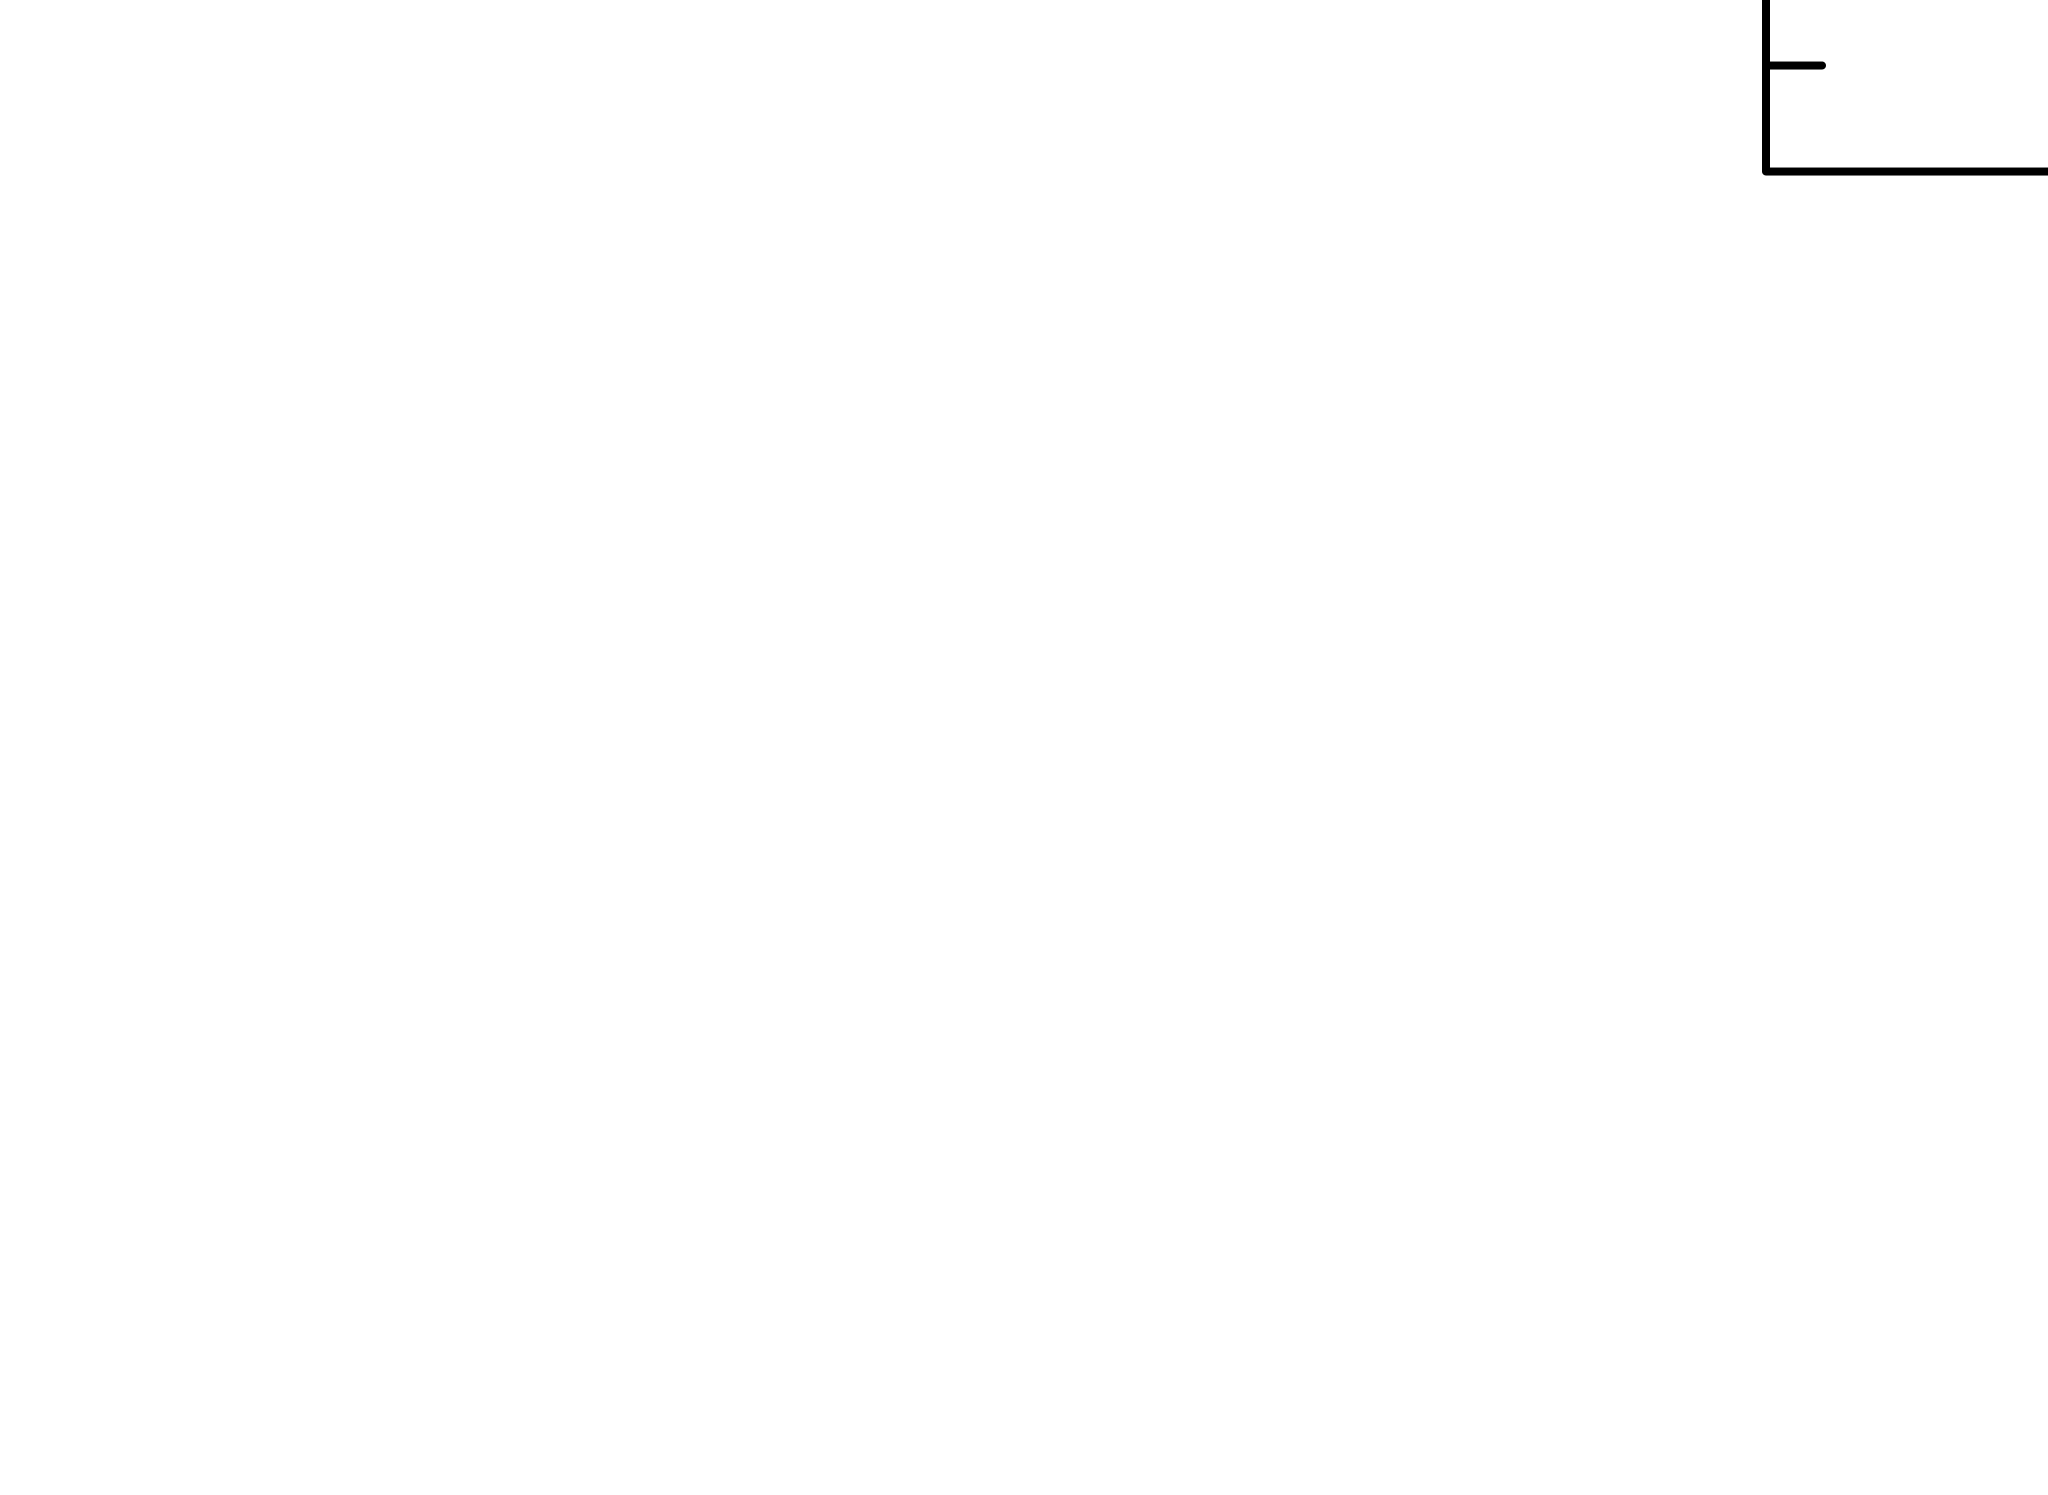

     2 channels (1-2) ignored in spectrum #     1
     1 channels (104) ignored in spectrum #     1


Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms

In [12]:
spec.ignore("**-0.2 12.0-**")
mo5 = Model("tbabs*(powerlaw+gaussian)")
mo5.gaussian.LineE = 6.7
mo5.gaussian.LineE.frozen=True
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")

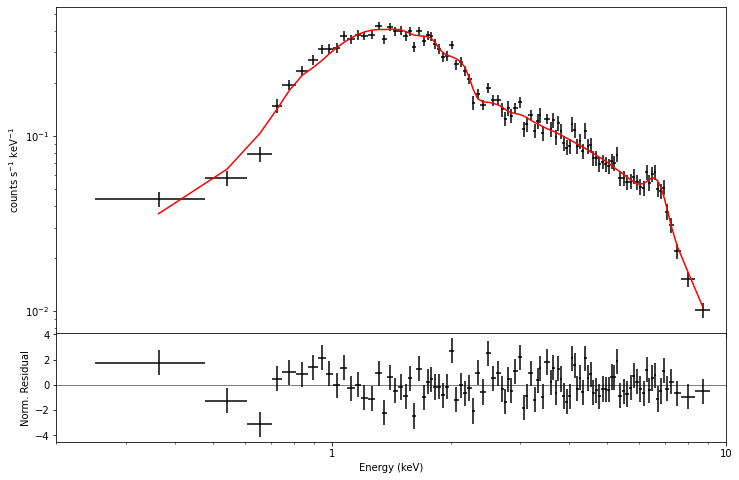

In [17]:
from matplotlib.ticker import StrMethodFormatter, NullFormatter
emin = 0.2
emax = 10
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace':0},figsize=(12,8))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(emin, emax)
ax1.set_ylabel('counts s$^{-1}$ keV$^{-1}$')
ax1.errorbar(Plot.x(), Plot.y(),Plot.yErr(), Plot.xErr(),ls=' ', color='k')
ax1.plot(Plot.x(),Plot.model(), color='r')
ax2.set_xscale('log')
ax2.set_xlim(emin, emax)
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel('Norm. Residual')
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.errorbar(Plot.x(), (np.asarray(Plot.y())-np.asarray(Plot.model()))/Plot.yErr(),1,Plot.xErr(), ls=' ', color='k')
ax2.hlines(0,emin, emax,color='k', lw=0.5)
plt.savefig('0886090801_001_model_fit_plot.png')
